# 1 2 3 4

In [1]:
def XOR(a, b):
    return a ^ b

def XNOR(a, b):
    return ~(a ^ b) & 1

def NAND(a, b):
    return ~(a & b) & 1

In [2]:
def full_adder_XOR(a, b, cin):
    sum_ = XOR(XOR(a, b), cin)
    cout = (a & b) | (cin & XOR(a, b))
    return sum_, cout

print("Full Adder (XOR):")
for A in [0,1]:
    for B in [0,1]:
        for Cin in [0,1]:
            s, c = full_adder_XOR(A,B,Cin)
            print(f"A={A}, B={B}, Cin={Cin} => Sum={s}, Cout={c}")

def full_subtractor_XOR(a, b, bin_):
    diff = XOR(XOR(a, b), bin_)
    bout = ((~a & b) | (bin_ & ~XOR(a, b))) & 1
    return diff, bout

print("\n\nFull Subtractor (XOR):")
for A in [0,1]:
    for B in [0,1]:
        for Bin in [0,1]:
            d, b = full_subtractor_XOR(A,B,Bin)
            print(f"A={A}, B={B}, Bin={Bin} => Diff={d}, Bout={b}")

Full Adder (XOR):
A=0, B=0, Cin=0 => Sum=0, Cout=0
A=0, B=0, Cin=1 => Sum=1, Cout=0
A=0, B=1, Cin=0 => Sum=1, Cout=0
A=0, B=1, Cin=1 => Sum=0, Cout=1
A=1, B=0, Cin=0 => Sum=1, Cout=0
A=1, B=0, Cin=1 => Sum=0, Cout=1
A=1, B=1, Cin=0 => Sum=0, Cout=1
A=1, B=1, Cin=1 => Sum=1, Cout=1


Full Subtractor (XOR):
A=0, B=0, Bin=0 => Diff=0, Bout=0
A=0, B=0, Bin=1 => Diff=1, Bout=1
A=0, B=1, Bin=0 => Diff=1, Bout=1
A=0, B=1, Bin=1 => Diff=0, Bout=1
A=1, B=0, Bin=0 => Diff=1, Bout=0
A=1, B=0, Bin=1 => Diff=0, Bout=0
A=1, B=1, Bin=0 => Diff=0, Bout=0
A=1, B=1, Bin=1 => Diff=1, Bout=1


In [3]:
def full_adder_XNOR(a, b, cin):
    sum_ = XNOR(XNOR(a, b), cin)
    cout = (a & b) | (cin & XNOR(a, b))
    return sum_, cout

print("\nFull Adder (XNOR):")
for A in [0,1]:
    for B in [0,1]:
        for Cin in [0,1]:
            s, c = full_adder_XNOR(A,B,Cin)
            print(f"A={A}, B={B}, Cin={Cin} => Diff={s}, Cout={c}")


Full Adder (XNOR):
A=0, B=0, Cin=0 => Diff=0, Cout=0
A=0, B=0, Cin=1 => Diff=1, Cout=1
A=0, B=1, Cin=0 => Diff=1, Cout=0
A=0, B=1, Cin=1 => Diff=0, Cout=0
A=1, B=0, Cin=0 => Diff=1, Cout=0
A=1, B=0, Cin=1 => Diff=0, Cout=0
A=1, B=1, Cin=0 => Diff=0, Cout=1
A=1, B=1, Cin=1 => Diff=1, Cout=1


In [4]:
def NAND(a, b):
    return ~(a & b) & 1

def NOT(a):
    return NAND(a, a)

def AND(a, b):
    return NOT(NAND(a, b))

def OR(a, b):
    return NAND(NOT(a), NOT(b))

def XOR(a, b):
    t1 = NAND(a, b)
    t2 = NAND(a, t1)
    t3 = NAND(b, t1)
    return NAND(t2, t3)

def full_subtractor_NAND(A, B, Bin):
    # Diff = A ^ B ^ Bin
    t1 = XOR(A, B)
    Diff = XOR(t1, Bin)

    # Bout = (~A & B) | (Bin & ~(A ^ B))
    term1 = AND(NOT(A), B)
    term2 = AND(Bin, NOT(t1))
    Bout = OR(term1, term2)

    return Diff, Bout

# Test all combinations
print("Full Subtractor using NAND only:")
for A in [0,1]:
    for B in [0,1]:
        for Bin in [0,1]:
            d, bout = full_subtractor_NAND(A, B, Bin)
            print(f"A={A}, B={B}, Bin={Bin} => Diff={d}, Bout={bout}")


Full Subtractor using NAND only:
A=0, B=0, Bin=0 => Diff=0, Bout=0
A=0, B=0, Bin=1 => Diff=1, Bout=1
A=0, B=1, Bin=0 => Diff=1, Bout=1
A=0, B=1, Bin=1 => Diff=0, Bout=1
A=1, B=0, Bin=0 => Diff=1, Bout=0
A=1, B=0, Bin=1 => Diff=0, Bout=0
A=1, B=1, Bin=0 => Diff=0, Bout=0
A=1, B=1, Bin=1 => Diff=1, Bout=1


# 5

In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_dx_sigmoid(x):
    return x * (1 - x)

In [6]:
def train_gate(gate, epochs=1000, lr=0.5):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])

    if gate == "XOR":
        y = np.array([[0],[1],[1],[0]])
    elif gate == "XNOR":
        y = np.array([[1],[0],[0],[1]])
    else:
        raise ValueError("Gate must be XOR or XNOR")

    np.random.seed(42)
    w_hidden = np.random.uniform(size=(2, 2))
    b_hidden = np.random.uniform(size=(1, 2))
    w_output = np.random.uniform(size=(2, 1))
    b_output = np.random.uniform(size=(1, 1))

    for _ in range(epochs):

        # Forward Pass
        hidden_input = np.dot(X, w_hidden) + b_hidden
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, w_output) + b_output
        final_output = sigmoid(final_input)

        # Error Calc
        error = y - final_output

        # Backward Pass
        d_output = error * d_dx_sigmoid(final_output)
        error_hidden = d_output.dot(w_output.T)
        d_hidden = error_hidden * d_dx_sigmoid(hidden_output)
        w_output += hidden_output.T.dot(d_output) * lr
        b_output += np.sum(d_output, axis=0, keepdims=True) * lr
        w_hidden += X.T.dot(d_hidden) * lr
        b_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

        print(f"---Epoch {_+1}/1000 --------------------------------------------")
        # Print weights for forward pass and backward pass
        print(f"Hidden Layer Weights: {w_hidden}, Hidden Layer Biases: {b_hidden}")
        print(f"Output Layer Weights: {w_output}, Output Layer Biases: {b_output}")

    def gate_fn(a, b):
        inp = np.array([[a, b]])
        hidden = sigmoid(np.dot(inp, w_hidden) + b_hidden)
        out = sigmoid(np.dot(hidden, w_output) + b_output)
        return int(round(out[0][0]))

    return gate_fn


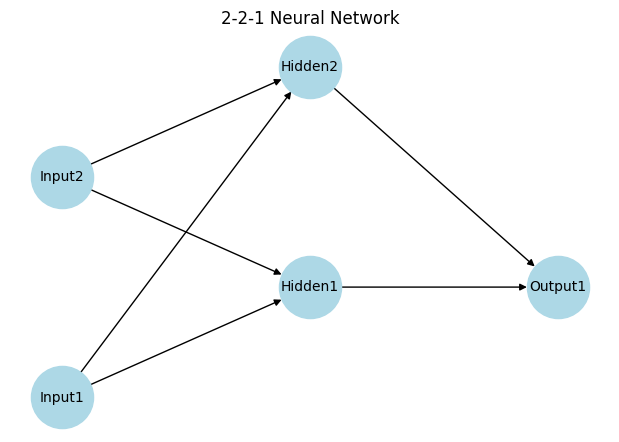

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_network(input_size=2, hidden_size=2, output_size=1):
    G = nx.DiGraph()

    # Create node labels
    input_nodes = [f"Input{i+1}" for i in range(input_size)]
    hidden_nodes = [f"Hidden{i+1}" for i in range(hidden_size)]
    output_nodes = [f"Output{i+1}" for i in range(output_size)]

    # Add nodes
    G.add_nodes_from(input_nodes, layer="Input")
    G.add_nodes_from(hidden_nodes, layer="Hidden")
    G.add_nodes_from(output_nodes, layer="Output")

    # Connect input → hidden
    for i in input_nodes:
        for h in hidden_nodes:
            G.add_edge(i, h)

    # Connect hidden → output
    for h in hidden_nodes:
        for o in output_nodes:
            G.add_edge(h, o)

    # Positioning for visualization
    pos = {}
    for i, node in enumerate(input_nodes):
        pos[node] = (0, i)
    for i, node in enumerate(hidden_nodes):
        pos[node] = (1, i + 0.5)
    for i, node in enumerate(output_nodes):
        pos[node] = (2, i + 0.5)

    # Draw the network
    plt.figure(figsize=(6,4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, arrows=True)
    plt.title("2-2-1 Neural Network")
    plt.show()

# Example visualization
visualize_network()


In [8]:
XNOR_gate = train_gate("XNOR")

---Epoch 1/1000 --------------------------------------------
Hidden Layer Weights: [[0.3738021  0.94179585]
 [0.73134325 0.58772576]], Hidden Layer Biases: [[0.15480664 0.13936317]]
Output Layer Weights: [[-0.00645997]
 [ 0.79653226]], Output Layer Biases: [[0.50660878]]
---Epoch 2/1000 --------------------------------------------
Hidden Layer Weights: [[0.37388436 0.93346963]
 [0.7314147  0.57752083]], Hidden Layer Biases: [[0.15493798 0.12425551]]
Output Layer Weights: [[-0.06908452]
 [ 0.729281  ]], Output Layer Biases: [[0.41506391]]
---Epoch 3/1000 --------------------------------------------
Hidden Layer Weights: [[0.37473454 0.92601781]
 [0.73213832 0.56837361]], Hidden Layer Biases: [[0.15624625 0.11118309]]
Output Layer Weights: [[-0.12714496]
 [ 0.66720085]], Output Layer Biases: [[0.33044131]]
---Epoch 4/1000 --------------------------------------------
Hidden Layer Weights: [[0.37619418 0.91960058]
 [0.73334851 0.56046556]], Hidden Layer Biases: [[0.15838693 0.1003858 ]]
Ou

In [9]:
XOR_gate = train_gate("XOR")

---Epoch 1/1000 --------------------------------------------
Hidden Layer Weights: [[0.37414724 0.94644134]
 [0.73159017 0.59514769]], Hidden Layer Biases: [[0.15484811 0.14031279]]
Output Layer Weights: [[-0.0043076 ]
 [ 0.80117246]], Output Layer Biases: [[0.5046942]]
---Epoch 2/1000 --------------------------------------------
Hidden Layer Weights: [[0.37417479 0.94267915]
 [0.73161885 0.5922584 ]], Hidden Layer Biases: [[0.15493116 0.12645871]]
Output Layer Weights: [[-0.06463757]
 [ 0.73866039]], Output Layer Biases: [[0.41159317]]
---Epoch 3/1000 --------------------------------------------
Hidden Layer Weights: [[0.37453947 0.93961177]
 [0.7320071  0.59015594]], Hidden Layer Biases: [[0.1560696  0.11483412]]
Output Layer Weights: [[-0.12045702]
 [ 0.68117552]], Output Layer Biases: [[0.32553276]]
---Epoch 4/1000 --------------------------------------------
Hidden Layer Weights: [[0.37509032 0.9373334 ]
 [0.73261613 0.58890609]], Hidden Layer Biases: [[0.15791501 0.10557268]]
Out

In [10]:
print("XOR and XNOR Gate: ")
for A in [0,1]:
    for B in [0,1]:
        xor_out = XOR_gate(A,B)
        xnor_out = XNOR_gate(A,B)
        print(f"A={A}, B={B} => XOR={xor_out}, XNOR={xnor_out}")

XOR and XNOR Gate: 
A=0, B=0 => XOR=0, XNOR=1
A=0, B=1 => XOR=1, XNOR=0
A=1, B=0 => XOR=1, XNOR=0
A=1, B=1 => XOR=0, XNOR=1
